In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from sklearn.utils import shuffle

<IPython.core.display.Javascript object>


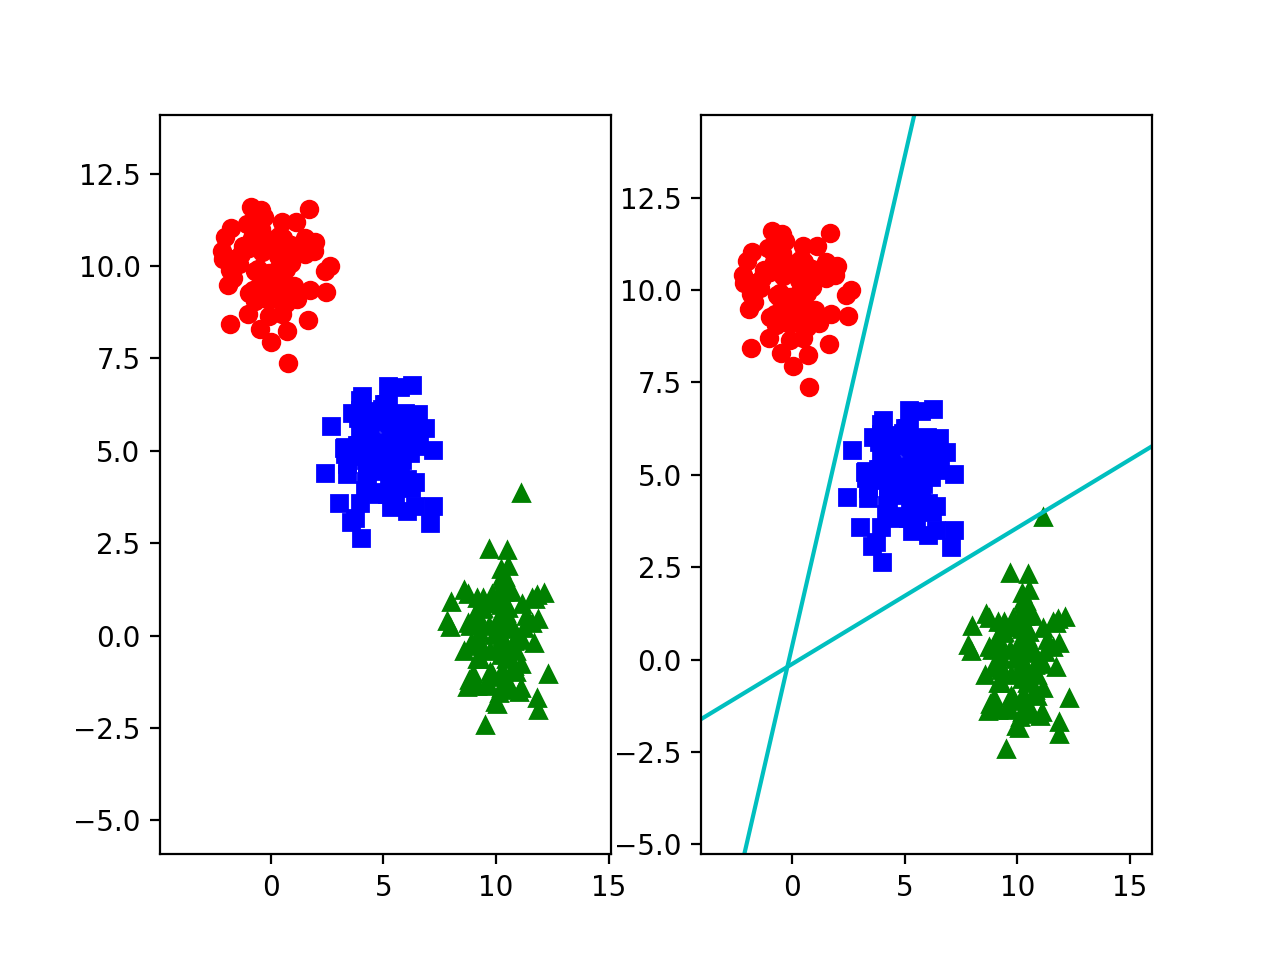

(-5, 15)

In [3]:
fig, (plot1, plot2) = plt.subplots(1,2)
plot1.set_xlim([-5, 15])
plot1.set_ylim([-5, 15])
plot2.set_xlim([-5, 15])
plot2.set_ylim([-5, 15])

In [4]:
# 학습에 필요한 데이터 정리
M = 2
K = 3
n = 100
N = n * K

In [5]:
# 샘플 데이터
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])

Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

In [6]:
# 샘플 데이터 분포
plot1.plot(X1[:, 0], X1[:, 1], 'ro',
         X2[:, 0], X2[:, 1], 'bs',
         X3[:, 0], X3[:, 1], 'g^')
plot2.plot(X1[:, 0], X1[:, 1], 'ro',
         X2[:, 0], X2[:, 1], 'bs',
         X3[:, 0], X3[:, 1], 'g^')

In [7]:
# 모델 정의
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [8]:
# 미니 배치의 크기, 수
batch_size = 50
n_batches = N

In [9]:
# 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [10]:
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

In [11]:
# 분류가 잘 되었는지 테스트
X_, Y_ = shuffle(X, Y)
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

In [12]:
print('classified:')
print(classified)

classified:
[ True  True  True  True  True  True  True  True  True  True]


In [13]:
print('prob:')
print(prob)

prob:
[[6.8232039e-04 8.5429466e-01 1.4502303e-01]
 [1.5952380e-10 3.2198985e-04 9.9967802e-01]
 [7.5690985e-02 8.9940596e-01 2.4903094e-02]
 [9.9433941e-01 5.6605847e-03 7.0619430e-09]
 [9.9937111e-01 6.2892732e-04 1.6741308e-10]
 [3.6766327e-08 3.7930131e-02 9.6206981e-01]
 [9.9848831e-01 1.5116624e-03 3.1958775e-10]
 [9.9786949e-01 2.1304768e-03 3.3208106e-10]
 [1.0685679e-09 3.8856540e-03 9.9611437e-01]
 [3.0643393e-03 9.0445232e-01 9.2483357e-02]]


In [14]:
# 결과 plot
plot_w = np.transpose(sess.run(W))
plot_b = sess.run(b)

In [15]:
plot_x1 = np.arange(-10, 20)
plot_y1 = -((plot_w[0][0] - plot_w[1][0]) * plot_x1 +
            plot_b[0] - plot_b[1]) / (plot_w[0][1] - plot_w[1][1])

plot_x2 = np.arange(-10, 20)
plot_y2 = -((plot_w[1][0] - plot_w[2][0]) * plot_x2 +
            plot_b[1] - plot_b[2]) / (plot_w[1][1] - plot_w[2][1])

In [16]:
plot2.plot(plot_x1, plot_y1, 'c-')
plot2.plot(plot_x2, plot_y2, 'c-')